### <center> Mollification infor extraction using Shearlets </center>

In [1]:
# Loard the Pkg
push!(LOAD_PATH,pwd()*"/../../src") 
import Shearlab
#using Shearlab
using PyPlot
reload("Shearlab")
using Images

ArrayFire v3.3.2 (OpenCL, 64-bit Mac OSX, build f65dd97)
[0] APPLE   : Intel(R) Iris(TM) Graphics 6100, 1536 MB


In [2]:
# Read Data
n = 256;
psi1 = Shearlab.load_image("./psi1.png",n)
psi1 = psi1[:,:,1];
psi2 = Shearlab.load_image("./psi2.png",n)
psi2 = psi2[:,:,1];
psi3 = Shearlab.load_image("./psi3.png",n)
psi3 = psi3[:,:,1];

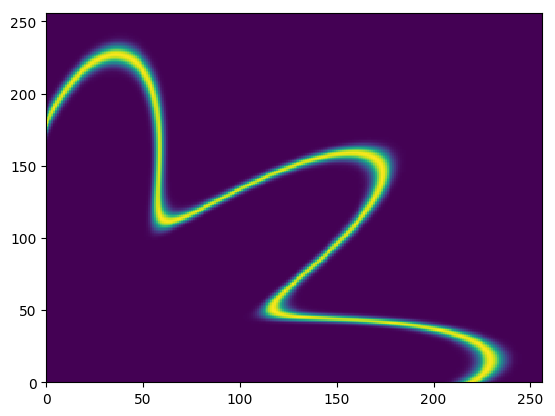

PyObject <matplotlib.collections.QuadMesh object at 0x14115c650>

In [3]:
pcolormesh(psi1)

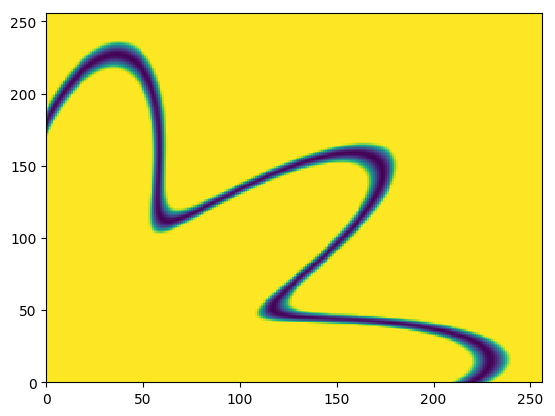

PyObject <matplotlib.collections.QuadMesh object at 0x13efc0fd0>

In [4]:
pcolormesh(psi2)

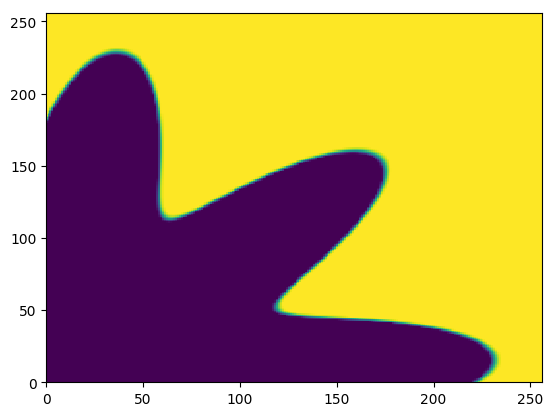

PyObject <matplotlib.collections.QuadMesh object at 0x141ad5790>

In [5]:
pcolormesh(psi3)

Lets check the the size of thickness of the smoothed distributions, we are gonna take the average of the number of nonzero pixels of the first dataset and the number of nonone pixels of the second data set.

In [79]:
thickness1 = sum([sum(psi1[i,:].!=0) for i in 1:10])/size(psi1,1);
thickness2 = sum([sum(psi2[i,:].!=1) for i in 1:size(psi2,1)])/size(psi2,1);

In [88]:
scale1 = log2(convert(Int64,ceil(size(psi1,1)/32)))
scale2 = log2(convert(Int64,ceil(size(psi2,1)/32)));

In [90]:
scale1

3.0

In [91]:
2

2

The scale corresponding to this size is j=3.

In [8]:
# Parameters
rows = size(psi1,1)
cols = size(psi1,2);
nScales = 6;
shearLevels = ceil.((1:nScales)/2)
scalingFilter = Shearlab.filt_gen("scaling_shearlet");
directionalFilter = Shearlab.filt_gen("directional_shearlet");
waveletFilter = Shearlab.mirror(scalingFilter);
scalingFilter2 = scalingFilter;
full = 0;

In [9]:
cols

256

In [92]:
# Compute the corresponding shearlet system without gpu
@time shearletSystem= Shearlab.getshearletsystem2D(rows,cols,nScales, shearLevels,full,
                                directionalFilter,
                                scalingFilter);

size(directionalFilterUpsampled'')=(36, 9)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(11,)
size(directionalFilterUpsampled'')=(72, 9)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(25,)
size(directionalFilterUpsampled'')=(144, 9)
size(filterLow2[size(filterLow2,2)-shearLevel]'')=(53,)
  9.521625 seconds (1.06 M allocations: 3.860 GiB, 42.65% gc time)


In [93]:
# Computing the coefficients
psi1coeffs = Shearlab.SLsheardec2D(psi1,shearletSystem);
psi2coeffs = Shearlab.SLsheardec2D(psi2,shearletSystem);
psi3coeffs = Shearlab.SLsheardec2D(psi3,shearletSystem);

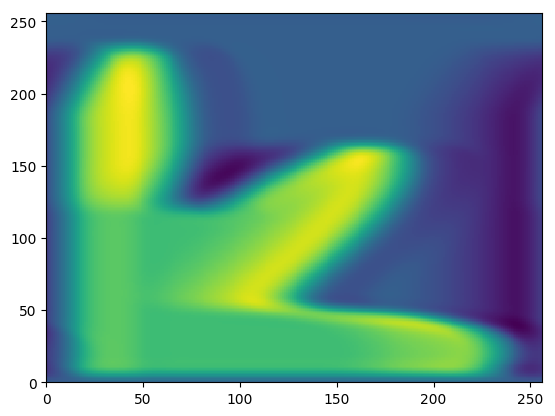

PyObject <matplotlib.collections.QuadMesh object at 0x111ba4390>

In [94]:
pcolormesh(real(psi3coeffs[:,:,1]))

Lets extract the coefficients corresponding to the scales bigger thant 3.

In [95]:
# Binary indices corresponding to coefficients of scale less tahn 3
bin_indices = shearletSystem.shearletIdxs[:,2].>3;

In [96]:
# Lets get the coefficients that are corresponding to this scales
curve_coeffs = copy(psi3coeffs);
curve_coeffs[:,:,bin_indices] = 0;

In [97]:
# Lets recover the
curve_info = Shearlab.SLshearrec2D(curve_coeffs,shearletSystem);

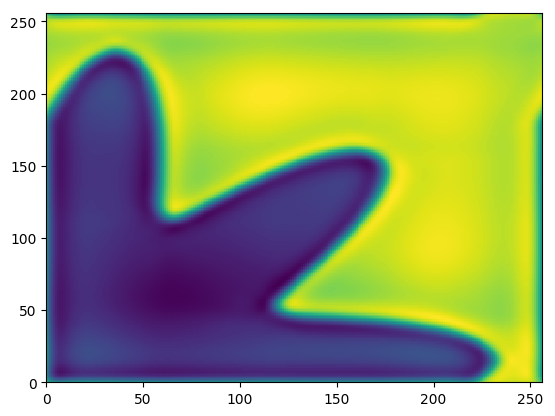

PyObject <matplotlib.collections.QuadMesh object at 0x14415d1d0>

In [98]:
pcolormesh(curve_info)

In [99]:
using Plotly

In [100]:
init_notebook(true)

true

In [101]:
z = curve_info
u = linspace(0, size(z,1), size(z,1))
v = linspace(0, size(z,2), size(z,2))
import PlotlyJS
PlotlyJS.plot([PlotlyJS.surface(x=u,y=v,z=z)])

In [102]:
using DataFrames

In [103]:
# Lets write the data to csv
df_psi1 = DataFrame(DataFrame(psi1))
writetable("psi1.csv", df_psi1, header=false)
df_psi2 = DataFrame(DataFrame(psi2))
writetable("psi2.csv", df_psi2, header=false)
df_psi3 = DataFrame(DataFrame(psi3))
writetable("psi3.csv", df_psi3, header=false)
df_curve_info = DataFrame(DataFrame(curve_info))
writetable("curve_info.csv", df_curve_info, header=false)

In [104]:
z = psi1
u = linspace(0, size(z,1), size(z,1))
v = linspace(0, size(z,2), size(z,2))
import PlotlyJS
PlotlyJS.plot([PlotlyJS.surface(x=u,y=v,z=z)])

Now lets extract the one dimensional distribution. We need to take the normal direction to the curve. First of all lets extract the information of the curve by the shearlet system above scale j=3. 

In [105]:
# Lets get the coefficients that are corresponding to this scales
psi1_curve_coeffs = copy(psi1coeffs);
psi1_curve_coeffs[:,:,bin_indices] = 0;

In [106]:
# Lets recover the
psi1_curve_info = Shearlab.SLshearrec2D(psi1_curve_coeffs,shearletSystem);

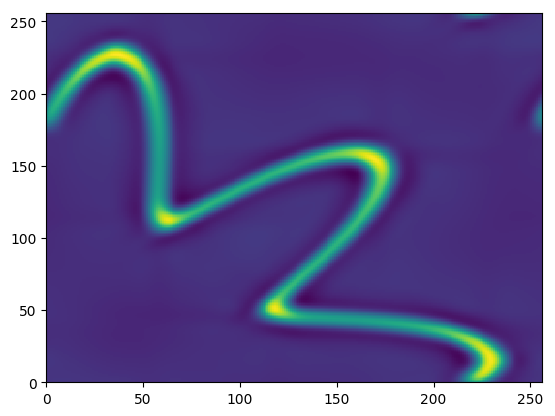

PyObject <matplotlib.collections.QuadMesh object at 0x14444b210>

In [107]:
pcolormesh(psi1_curve_info)

In [108]:
z = psi1_curve_info
u = linspace(0, size(z,1), size(z,1))
v = linspace(0, size(z,2), size(z,2))
import PlotlyJS
PlotlyJS.plot([PlotlyJS.surface(x=u,y=v,z=z)])

Lets localize the curve as a binary matrix, using the middle point of the horizontal values where the array is different than zero.

Lets also get a partition of the domain where the curve can be representated as a graph of a function

One can do a partition of 7 areas where the curve can be interpreted as a function.

In [109]:
# Indices sets per are
idx1 = 100:256
idy1 = 1:63
idx2 = 54:105
idy2 = 110:160
idx3 = 105:140
idy3 = 64:119
idx4 = 105:140
idy4 = 120:180
idx5 = 140:180
idy5 = 64:180
idx6 = 1:18
idy6 = 110:256
idx7 = 19:53
idy7 = 110:256

110:256

In [110]:
psi11 = psi1[idx1,idy1]

# Function that describes the curve with y and x values
fy1 = []
fx1 = [i for i in 1:size(psi11,2)];
for i in 1:size(psi11,2)
    push!(fy1,findmax(psi11[:,i])[2])
end
fx1 = fx1[.~isnan.(fy1)]
fy1 = fy1[.~isnan.(fy1)];

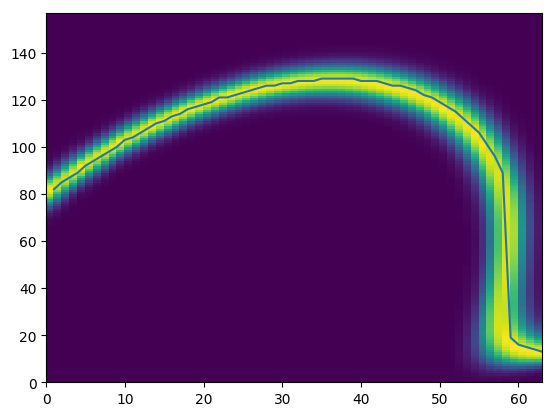

PyObject <matplotlib.collections.QuadMesh object at 0x14417a6d0>

In [111]:
PyPlot.plot(fx1,fy1)
pcolormesh(psi11)

In [112]:
psi12 = psi1[idx2,idy2]
# Function that describes the curve with y and x values
fy2 = []
fx2 = [i for i in 1:size(psi12,2)];
for i in 1:size(psi12,2)
    push!(fy2,findmax(psi12[:,i])[2])
end

fx2 = fx2[.~isnan.(fy2)]
fy2 = fy2[.~isnan.(fy2)];

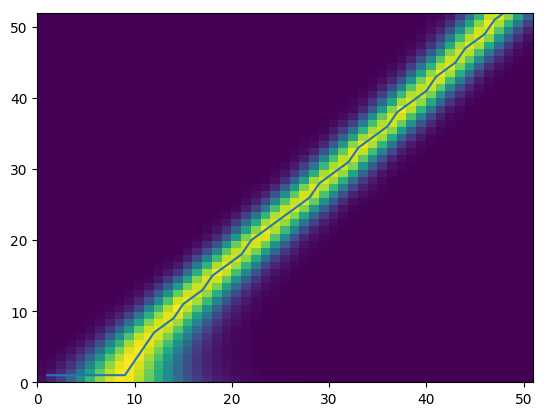

PyObject <matplotlib.collections.QuadMesh object at 0x1441b4b50>

In [113]:
PyPlot.plot(fx2,fy2)
pcolormesh(psi12)

In [114]:
psi13 = psi1[idx3,idy3]
# Function that describes the curve with y and x values
fy3 = []
fx3 = [i for i in 1:size(psi13,2)];
for i in 1:size(psi13,2)
    push!(fy3,findmax(psi13[:,i])[2])
end

fx3 = fx3[.~isnan.(fy3)]
fy3 = fy3[.~isnan.(fy3)];

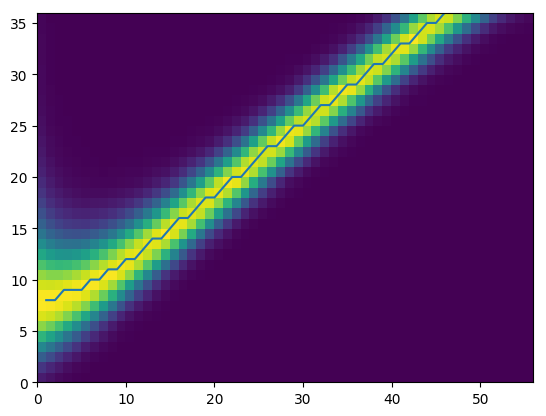

PyObject <matplotlib.collections.QuadMesh object at 0x144225b90>

In [115]:
PyPlot.plot(fx3,fy3)
pcolormesh(psi13)

In [116]:
psi14 = psi1[idx4,idy4]
# Function that describes the curve with y and x values
fy4 = []
fx4 = [i for i in 1:size(psi14,2)];
for i in 1:size(psi14,2)
    push!(fy4,findmax(psi14[:,i])[2])
end
fx4 = fx4[.~isnan.(fy4)]
fy4 = fy4[.~isnan.(fy4)];

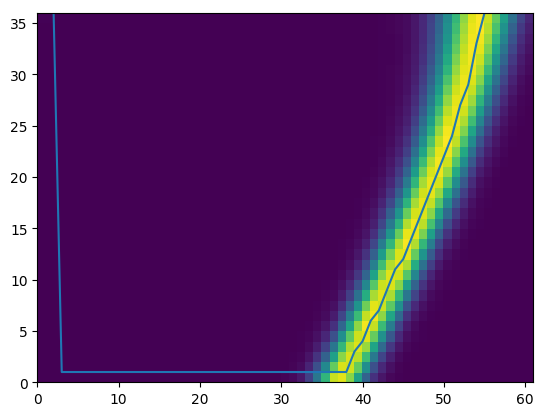

PyObject <matplotlib.collections.QuadMesh object at 0x14504f2d0>

In [117]:
PyPlot.plot(fx4,fy4)
pcolormesh(psi14)

In [118]:
psi15 = psi1[idx5,idy5]
# Function that describes the curve with y and x values
fy5 = []
fx5 = [i for i in 1:size(psi15,2)];
for i in 1:size(psi15,2)
    push!(fy5,findmax(psi15[:,i])[2])
end
fx5 = fx5[.~isnan.(fy5)]
fy5 = fy5[.~isnan.(fy5)];

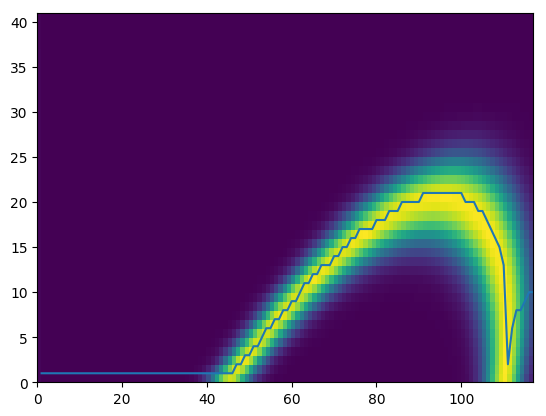

PyObject <matplotlib.collections.QuadMesh object at 0x1450cc890>

In [119]:
PyPlot.plot(fx5,fy5)
pcolormesh(psi15)

In [120]:
psi16 = psi1[idx6,idy6]
# Function that describes the curve with y and x values
fy6 = []
fx6 = [i for i in 1:size(psi16,2)];
for i in 1:size(psi16,2)
    push!(fy6,findmax(psi16[:,i])[2])
end
fx6 = fx6[.~isnan.(fy6)]
fy6 = fy6[.~isnan.(fy6)];

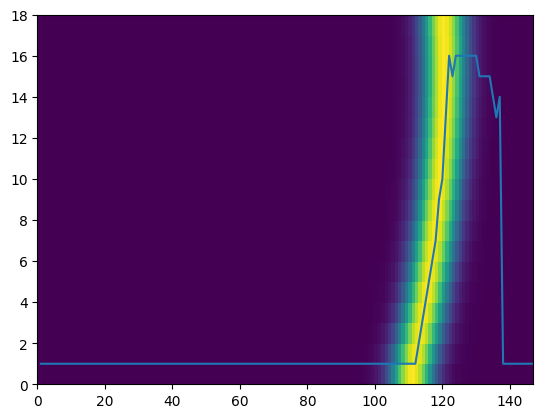

PyObject <matplotlib.collections.QuadMesh object at 0x145147e50>

In [121]:
PyPlot.plot(fx6,fy6)
pcolormesh(psi16)

In [122]:
psi17 = psi1[idx7,idy7]
# Function that describes the curve with y and x values
fy7 = []
fx7 = [i for i in 1:size(psi17,2)];
for i in 1:size(psi17,2)
    push!(fy7,findmax(psi17[:,i])[2])
end
fx7 = fx7[.~isnan.(fy7)]
fy7 = fy7[.~isnan.(fy7)];

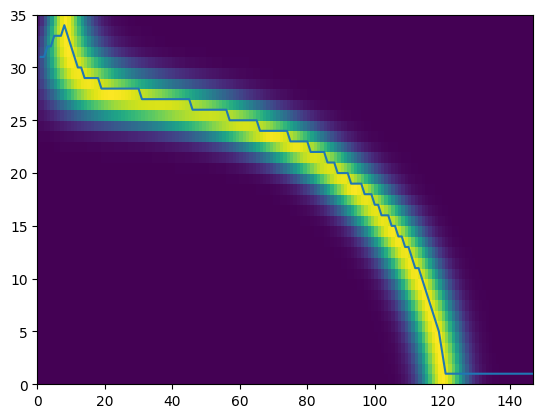

PyObject <matplotlib.collections.QuadMesh object at 0x1451cef50>

In [123]:
PyPlot.plot(fx7,fy7)
pcolormesh(psi17)

From this curves we can get the distribution around the curve using the points, its derivative and therefore the normal. Lets use for example the first section

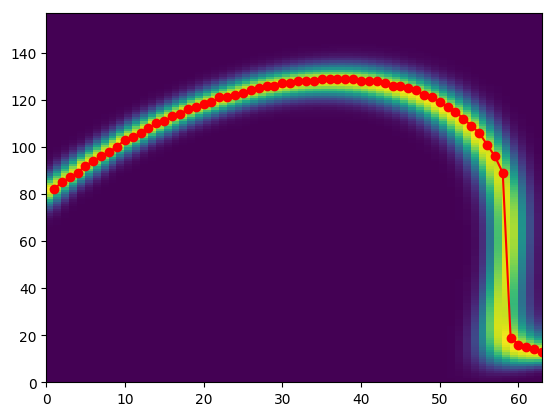

PyObject <matplotlib.collections.QuadMesh object at 0x145254650>

In [124]:
# Lets use for example the first seccion
PyPlot.plot(fx1,fy1,"-ro")
pcolormesh(psi11)

Lets use finite diferences. If the function is defined as $f(x_i)=y_i$ for $i=1,...,N$ then,  $f'(x_i) = \frac{y_{i+1}-y_i}{(x_{i+1}-x_i)} $. The slope of the normal line to the curve at the point $(x_i,y_i)$ will be then 
$m^{N}_i=-\frac{1}{f'(x_i)}$.

The equation of the normal will be then, $y=-\frac{1}{f'(x_i)}(x-x_i)+y_i$.  

Lets use for the derivative a 2 points stencil

$$f'(x_i) \simeq \frac{\frac{-11}{6}y_i+3y_{i+1}-\frac{3}{2}y_{i+2}+\frac{1}{3}y_{i+3}}{x_{i+1}-x_{i}} $$

In [125]:
# Function that computes the normal direction
function normal_dir(x,y,i)
    # Compute the three stencil forward finite difference
    mi = (y[i+1]-y[i-1])/(x[i+1]-x[i-1])
    # Normal line slope
    return miN = -1/mi
end

normal_dir (generic function with 1 method)

In [126]:
# function normal line
function normal_lint(x,mN,x0,y0)
    return mN*(x-x0)+y0
end

normal_lint (generic function with 1 method)

We can now compute the one dimensional distribution.

In [127]:
i=30
idx = idx1
idy = idy1
x = fx1
y = fy1;
curve = psi1_curve_info[idx,idy];

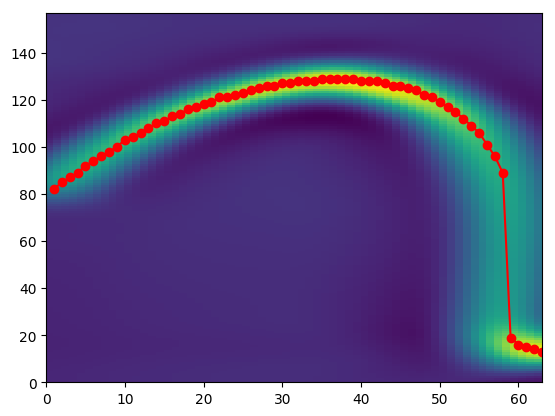

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x146d79a90>

In [128]:
pcolormesh(curve)
PyPlot.plot(fx1,fy1,"-ro")

In [129]:
function distr_compute(curve,idx, idy, x, y, i)
    xi= x[i]
    yi = y[i]
    mN = normal_dir(x,y,i)
    # Arrays of points 10 points around this point
    if i <= 20
        xs = [x[j] for j in 1:20]
    elseif i >= (size(curve,1)-20)
        xs = [x[j] for j in (size(curve,1)-20):size(curve,1)]
    else
        xs = [x[i+j] for j in -10:10]
    end
    ys = [convert(Int64,round(normal_lint(xsj,mN,xi,yi))) for xsj in xs];
    # Compute the distribution
    return [xs-xi,[curve[ys[j],xs[j]] for j in 1:size(ys,1)]]
end

distr_compute (generic function with 1 method)

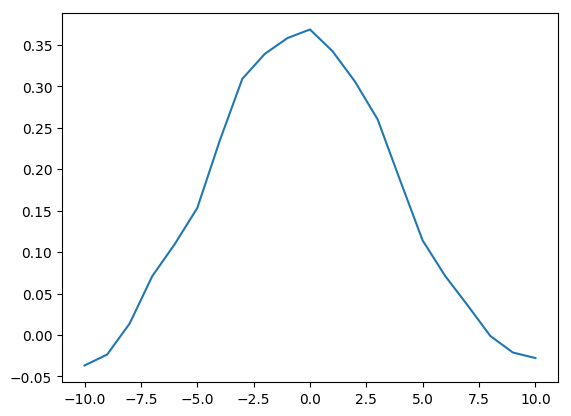

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147107590>

In [130]:
distr = distr_compute(curve,idx, idy, x, y, 50)
PyPlot.plot(distr[1],distr[2])

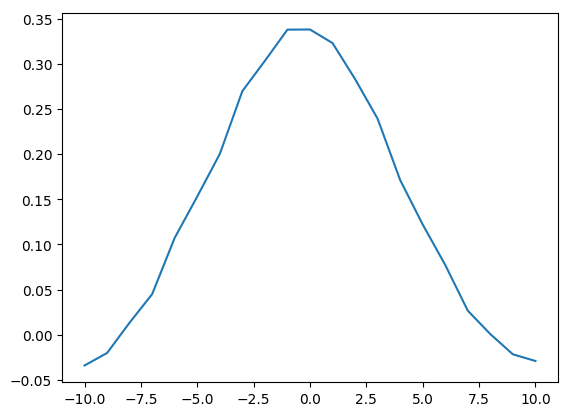

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14726fc10>

In [131]:
distr = distr_compute(curve,idx, idy, x, y, 52)
PyPlot.plot(distr[1],distr[2])